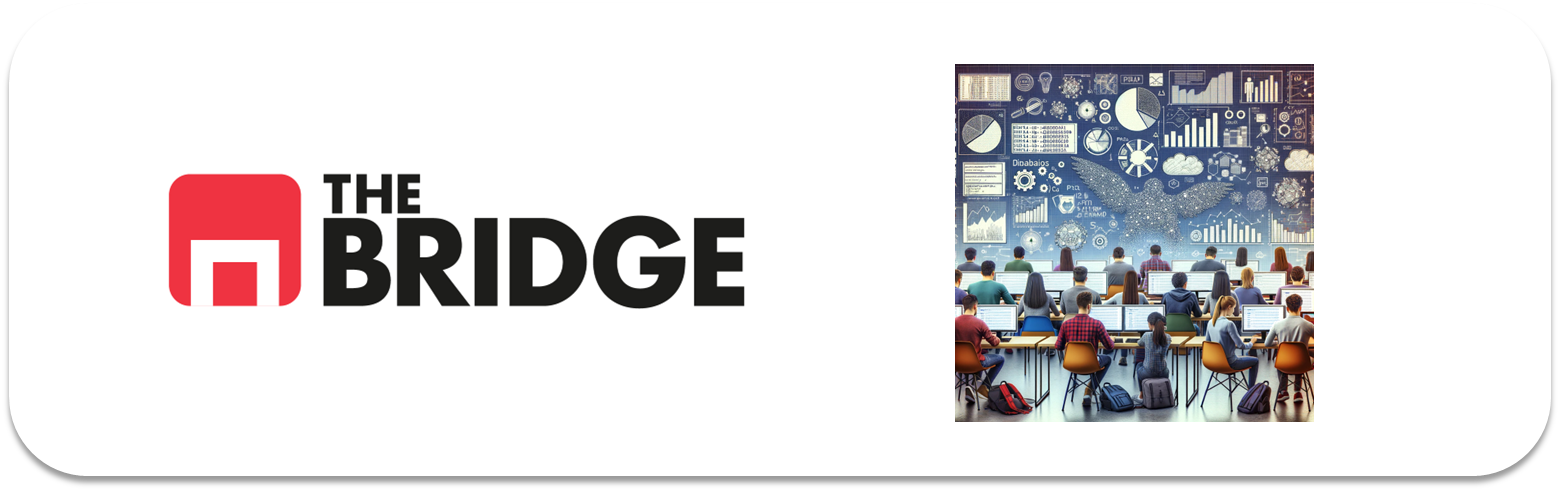

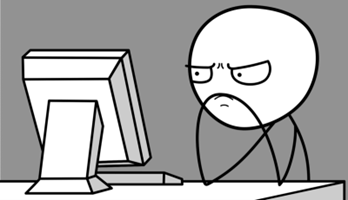

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [25]:
df = pd.read_csv("./advertising_ml.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Tipo de problema: problema de clasificacion, porque queremos predecir si pulsará o no en el link de un anuncio  
Tipo de aprendizaje: aprendizaje supervisado  
Variable target: Clicked on Ad  

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

| Columna                 | Definición                                | Clasificación         |
|-------------------------|-------------------------------------------|-----------------------|
| Daily Time Spent on Site | Tiempo que pasa en la página en segundos | numerica continua|
| Age                     | Edad de la persona                       |         numerica discreta   |
| Area Income             | Ingresos anuales en el área de la persona|   numerica continua         |
| Daily Internet Usage    | MB consumidos de internet diarios        |   numerica continua|
| Ad Topic Line           | Tema del Ad                              |   object          |
| City                    | Ciudad                                   |       object     |
| Male                    | Si es hombre o no                       |      binaria      |
| Country                 | País de la persona                       |       object     |
| Timestamp               | Horario en que hizo click/navegó en el sitio | time |
| Clicked on Ad           | Hizo click en el Ad o no                 |   binaria     - VARIABLE TARGET     |



In [15]:
df_tipificacion = pd.DataFrame([df.nunique(),df.nunique()/len(df)*100,df.dtypes]).T.rename(columns={0:"cardinalidad",1:"%_cardinalidad",2:"Tipo"})
df_tipificacion

,cardinalidad,%_cardinalidad,Tipo
Daily Time Spent on Site,900,90.0,float64
Age,83,8.3,object
Area Income,1000,100.0,float64
Daily Internet Usage,966,96.6,float64
Ad Topic Line,1000,100.0,object
City,969,96.9,object
Male,2,0.2,int64
Country,237,23.7,object
Timestamp,1000,100.0,object
Clicked on Ad,2,0.2,int64


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [29]:
df.duplicated() #elimino duplicados que en este caso no hay

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [31]:
#elimino todo lo que no sea caracter numerico de la columna age
df['Age'] = df['Age'].str.replace(r'\D+', '', regex=True).astype(int)

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [35]:
train_set, test_set = train_test_split(df,test_size =0.2,random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

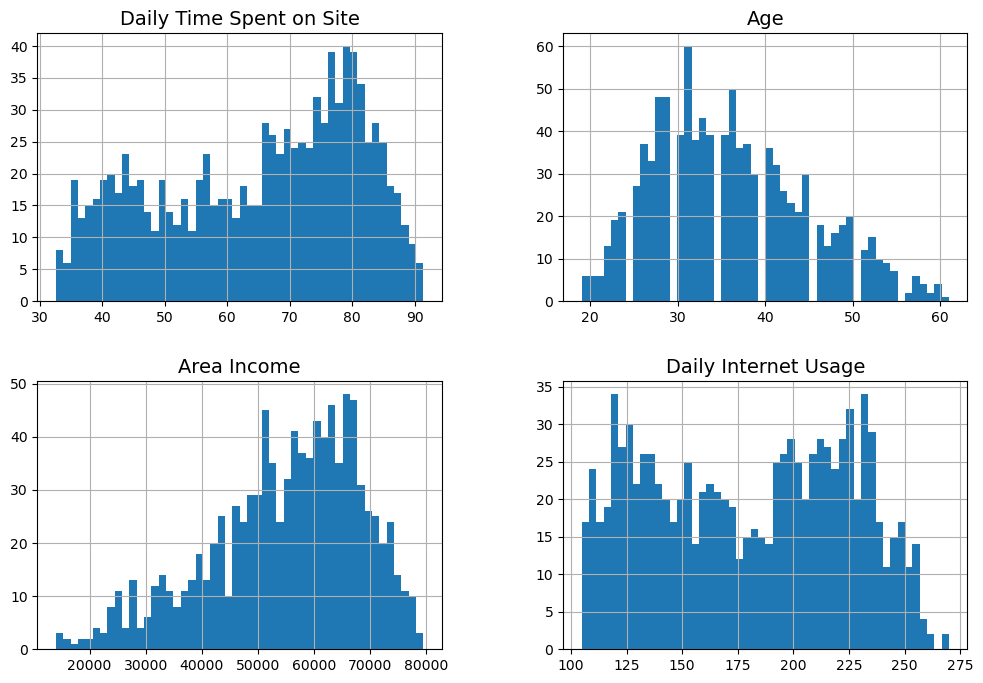

In [43]:
columns_to_exclude = ['Male', 'Clicked on Ad']
df_filtered = df.drop(columns=columns_to_exclude)

plt.rc('font',size =14)
plt.rc('axes',labelsize =14, titlesize=14)
plt.rc('legend',fontsize =14)
plt.rc('xtick',labelsize =10)
plt.rc('ytick',labelsize =10)

df_filtered.hist(bins = 50, figsize = (12,8))
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

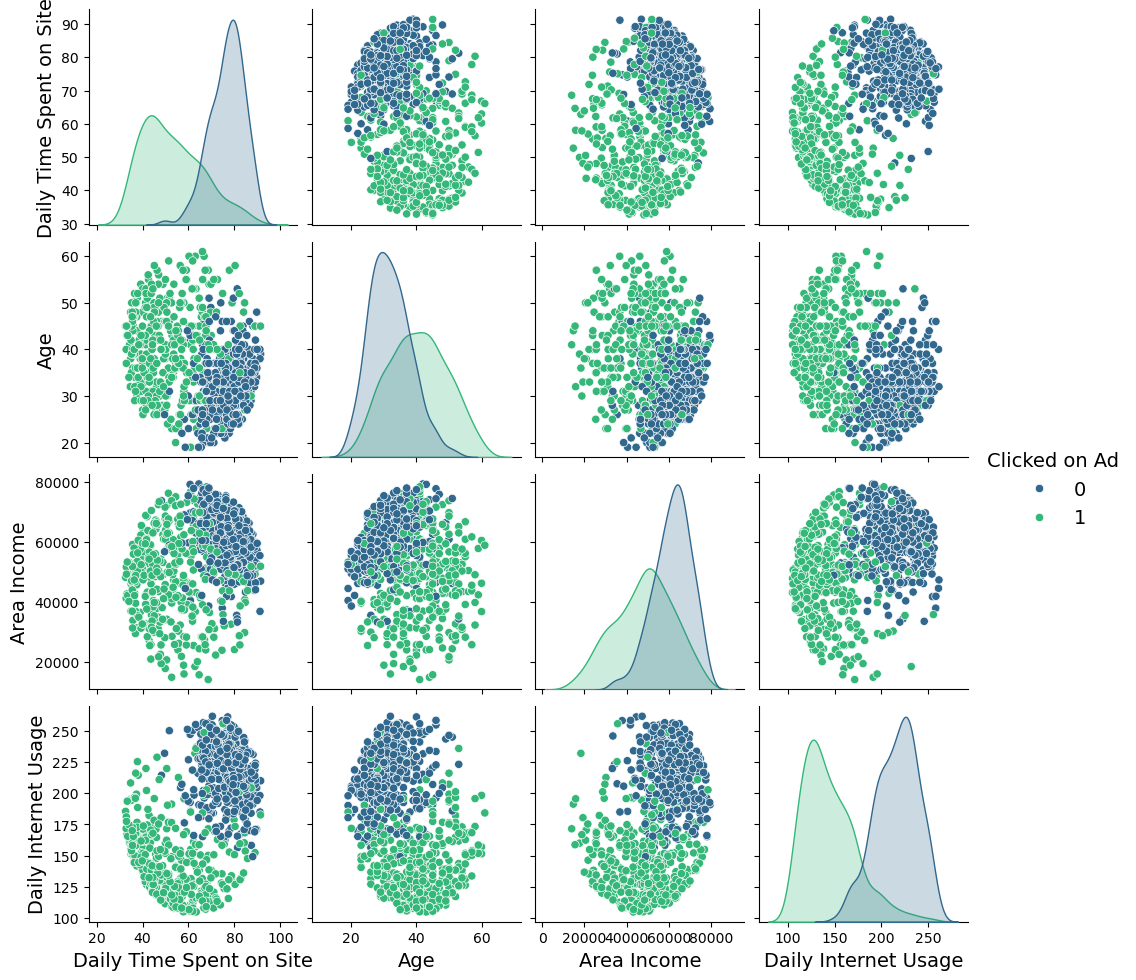

In [56]:
# Variables continuas (excluyendo binarias como 'Male' y 'Clicked on Ad')
variables_continuas = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Crear el PairPlot
sns.pairplot(
    train_set[variables_continuas + ['Clicked on Ad']],  # Selecciona columnas continuas y target
    hue='Clicked on Ad',  # Usar 'Clicked on Ad' como código de color
    diag_kind='kde',  # Usar distribución Kernel Density en la diagonal
    palette='viridis'  # Esquema de colores
)

# Mostrar la gráfica
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [58]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["Clicked on Ad"].sort_values(ascending=False)

Clicked on Ad               1.000000
Age                         0.482848
Male                       -0.043798
Area Income                -0.498504
Daily Time Spent on Site   -0.745492
Daily Internet Usage       -0.812130
Name: Clicked on Ad, dtype: float64

#Lista de Features
1. Age (positiva)
2. Daily Internet Usage (negativa).
3. Daily Time Spent on Site (negativa).
4. Area Income (negativa).